Customer churn is by far one of the most important metrics for a growing business to evaluate. While it's not the favorite measure, it's a number that can give your company the hard truth about its customer retention.Customer churn is the percentage of customers that stopped using your company's product or service during a certain time frame. In this case, customrs who stopped using Teleco phone servce. This analytic covers the importance of customer churn in  Teleco service and reasons customers leave the service. Going forward this project, we help the analytic personals and managers create a more affordable service and retain customers. Our data set we ask What are factors that lead to customer churn? This data was collected from Kaggle. Telecom Customer Churn. The data contains 21 variables and 7,043 observers. We do have missing values to fill and drop columns not needed.


This dataset contains information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

For this project we will complete the following to get better predictions of customer Churn

1. Data exploration & visualization
2. Holdout (splitting data)
3. PCA
     - gridsearchCV
     - Decision tree model class
         + Cross validation
         + Confusion matrix
         + Classification_report
      - Random forest model class
         + Cross validation
         + Confusion matrix
         + Classification_report
      -KNN Class
	+ Cross validation
         + Confusion matrix
         + Classification_report
      -Logistic Classification
	+ Cross validation
         + Confusion matrix
         + Classification_report
      -Support Vector Machine
	+ Cross validation
         + Confusion matrix
         + Classification_report

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from pylab import rcParams
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
# Decision tree graphics
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import Image  
from sklearn import tree
from sklearn.preprocessing import Imputer
import re
import itertools
from sklearn.preprocessing import LabelEncoder,OneHotEncoder



from sklearn.model_selection import train_test_split
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline




from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
telecom = pd.read_csv('telecomChurn.csv')

In [3]:
#viewing first 3 columns and rows
telecom.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
# 7,043 rows and 21 features
telecom.shape

(7043, 21)

In [5]:
# we look at the unique values in columns
for item in telecom.columns:
    print(item)
    print (telecom[item].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [6]:
#key columns
telecom.keys()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# Checking the data types of all the columns
# It seems majority of our data is categorical
telecom.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
# disply int and float columns with unique cat 
numeric_columns = telecom.select_dtypes(['int64', 'float64']).columns
print(telecom)
print("The number of numerical columns is {}".format(len(numeric_columns)))

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
5     9305-CDSKC  Female              0      No         No       8   
6     1452-KIOVK    Male              0      No        Yes      22   
7     6713-OKOMC  Female              0      No         No      10   
8     7892-POOKP  Female              0     Yes         No      28   
9     6388-TABGU    Male              0      No        Yes      62   
10    9763-GRSKD    Male              0     Yes        Yes      13   
11    7469-LKBCI    Male              0      No         No      16   
12    8091-TTVAX    Male              0     Yes         No      58   
13    0280-XJGEX    

In [9]:
#checking for null 
telecom.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
telecom.isnull().sum()/telecom.isnull().count()

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [11]:
non_numeric_columns = telecom.select_dtypes(['object']).columns
print(non_numeric_columns)
print("The number of non-numerical columns is {}".format(len(non_numeric_columns)))

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')
The number of non-numerical columns is 18


# 1) What are some factors that lead to customer churn?

([<matplotlib.patches.Wedge at 0x1a1f6bb3c8>,
 [Text(-0.7393678277834755, 0.8144539368428058, 'No'),
  Text(0.7393677515287918, -0.8144540060674139, 'Yes')],
 [Text(-0.40329154242735027, 0.44424760191425766, '73.5%'),
  Text(0.4032915008338864, -0.4442476396731348, '26.5%')])

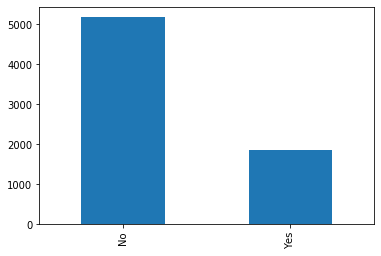

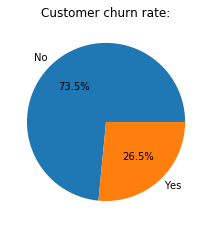

In [12]:
# Plot distribution of target variable which is the Churn column


telecom['Churn'].value_counts().head().plot.bar()   # To generate a bar plot

# To generate a pie chart. Since there are only two classes, a pie chart
sizes = telecom['Churn'].value_counts(sort = True)
labels = np.unique(telecom.Churn)

# Visualize the data
plt.figure(figsize = (10,8))
plt.subplot(212)
plt.title("Customer churn rate:")
plt.pie(sizes, labels = labels, autopct='%1.1f%%')

# Bar & pie plots below show that number of customers churned is less than half of not churned.

Our graph shows customer churn is almost 2,000 customers that remain with Teleo is just above 5,000. The pie chart shows 73.5% customers remain and 26.5% churn

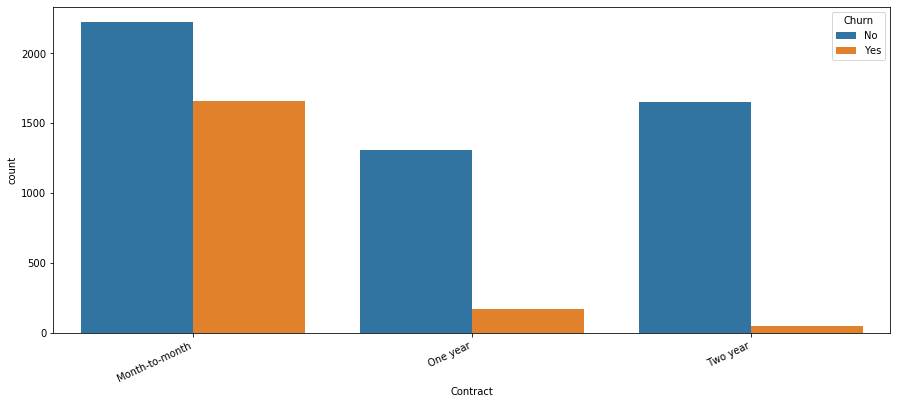

In [13]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x='Contract',hue='Churn', data=telecom)
ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right" )
plt.show()

our above graph displays contrats customers choose with Teleco. Those who choose month to month are prone to churn compared to one year and two years.

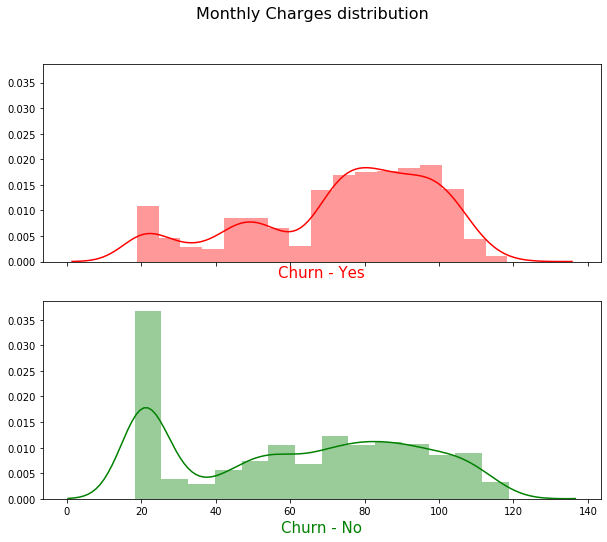

In [14]:
telecom['MonthlyCharges'] = telecom['MonthlyCharges'].replace(" ", 0).astype('float32')

fig, ax = plt.subplots(2, 1, figsize=(10,8), sharey=True, sharex=True)

# we see the difference between monthly charges as we compare churn and non churn
telecom['MonthlyCharges'] = telecom['MonthlyCharges'].replace(" ", 0).astype('float32')
sns.distplot(telecom[telecom['Churn']=="Yes"]["MonthlyCharges"] , color="red", ax=ax[0])
sns.distplot(telecom[telecom['Churn']=="No"]["MonthlyCharges"] , color="green", ax=ax[1])
        
ax[0].set_xlabel('Churn - Yes', size=15, color="red")
ax[1].set_xlabel('Churn - No', size=15, color="green")

fig.suptitle("Monthly Charges distribution", fontsize=16)
plt.show()

In the distribution above we notice customers who leave Teleo service pays more for their service monthly as majority of our data falls between 70 dollars and 120 dollars.

According to our distribution in green, customers who remain with Teleco pays much less monthly. We observe many customers pays $20 for service compared to customers who are churn.

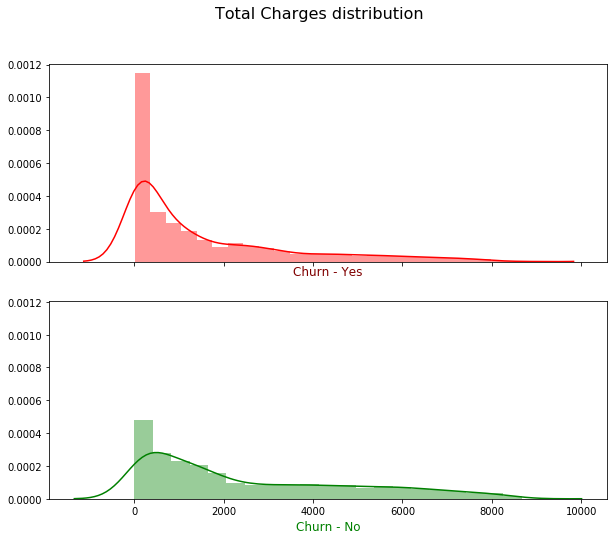

In [15]:
telecom['TotalCharges'] = telecom['TotalCharges'].replace(" ", 0).astype('float32')


fig, ax = plt.subplots(2, 1, figsize=(10,8), sharey=True, sharex=True)

sns.distplot(telecom[telecom['Churn']=="Yes"]["TotalCharges"] , color="red", ax=ax[0])
sns.distplot(telecom[telecom['Churn']=="No"]["TotalCharges"] , color="green", ax=ax[1])
        
ax[0].set_xlabel('Churn - Yes', size=12, color="#800000")
ax[1].set_xlabel('Churn - No', size=12, color="green")

fig.suptitle("Total Charges distribution", fontsize=16)
plt.show()

Next we look at our total charges distribution. Customers who are churn pays much more than those who remain with teleco. This could be because of month to month contracts churn customers choosed.

# 2 Which group of customer are more likely to be churn?

Text(0, 0.5, 'Monthly Charges')

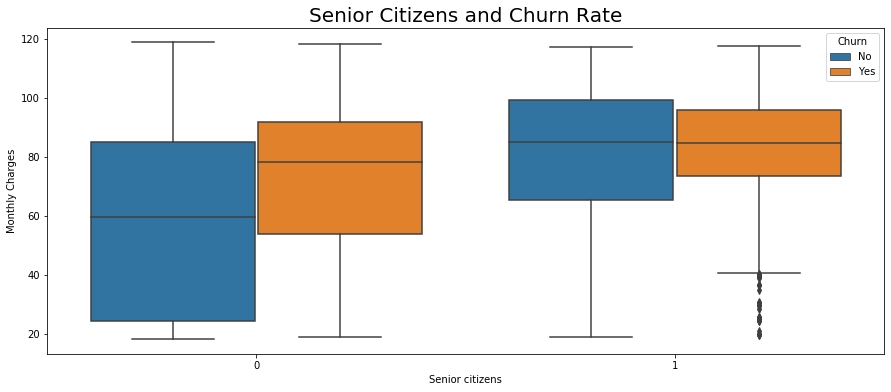

In [16]:
fig = plt.figure(figsize=(15,6))
sns.boxplot(x="SeniorCitizen",y="MonthlyCharges",data=telecom, hue="Churn")
plt.title("Senior Citizens and Churn Rate", fontsize=20)
plt.xlabel("Senior citizens", fontsize=10)
plt.ylabel("Monthly Charges", fontsize=10)

According to our box graph more senior citizens who remains with Teleco pays just over 80 dollars and those who leave Teleco pays around 85 to 90 dollars.

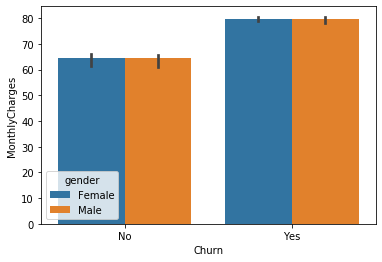

In [17]:
from numpy import median
sns.barplot(x='Churn', y='MonthlyCharges', hue= 'gender',data=telecom, estimator=median)
plt.show()

In our gender and total charges columns in corrolation with churn. For both males and females who are chun paid 20 dollars more then non chun customers. In both cases, the number of both genders are equal.

Churn     No   Yes   All
gender                  
Female  2549   939  3488
Male    2625   930  3555
All     5174  1869  7043


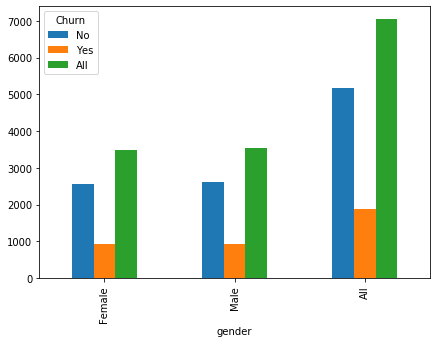

In [21]:
# now we start comparing
# gender vs churn
print(pd.crosstab(telecom.gender,telecom.Churn,margins=True))
pd.crosstab(telecom.gender,telecom.Churn,margins=True).plot(kind='bar',figsize=(7,5));

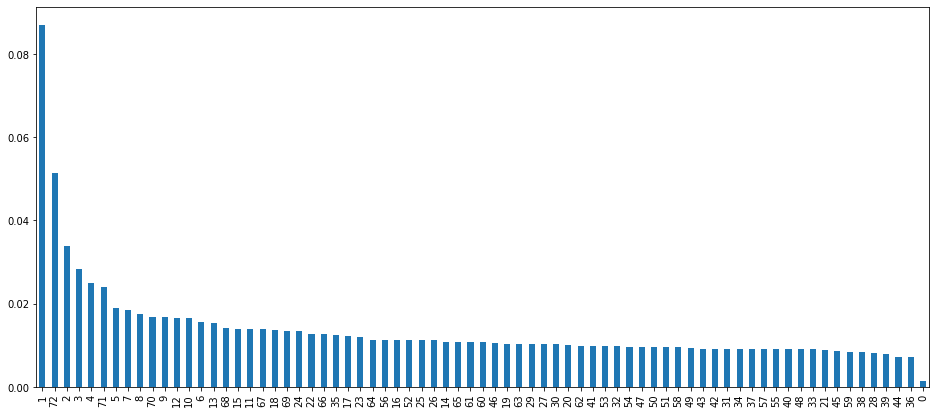

In [22]:
telecom.tenure.value_counts(normalize=True).plot(kind='bar',figsize=(16,7))

# 3) How are different services related to customer churn?

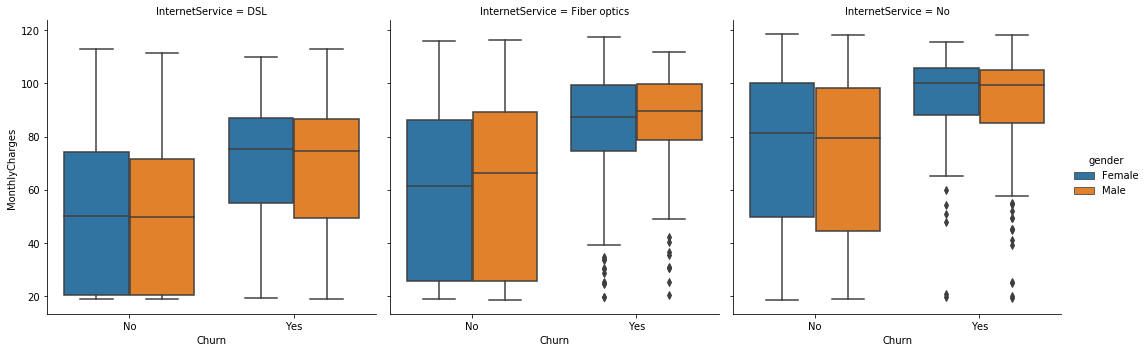

In [23]:
telecom['InternetService'] = pd.cut(telecom['tenure'], 3, labels=['DSL', 'Fiber optics', 'No'])
sns.catplot(x ='Churn', y = 'MonthlyCharges', hue = 'gender',col = 'InternetService', kind = 'box', data = telecom)
plt.show()

With Internet Service we see how much customers and those who are churn paid. In our legend 0 represents female and 1 represent males.

DSL service Males and females who are chun paid more than those who remain as customers

In Fiber Optics we see those who are churn paid almost $100. We see more females perfer fiber optics than DSL.

Those who no longer have service paid atleast $100 or more for their servce. Overall we see high price can lead to customer churn.



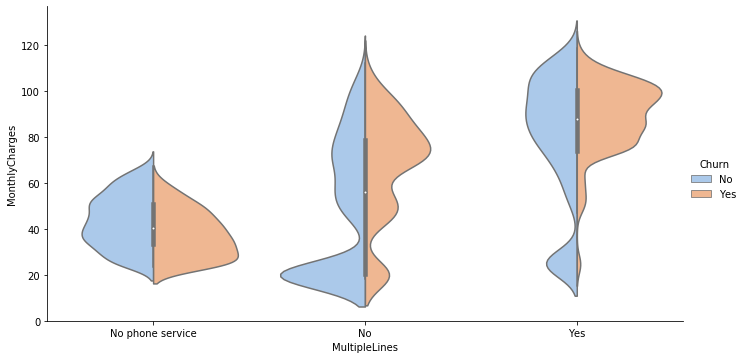

In [24]:
ax = sns.catplot(x="MultipleLines", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="pastel", data=telecom, height=5.1, aspect=1.9)

From our graph above, few customers do not have phone service.

It seems that customers with multiple lines have a slightly higher churn rate.

With multiple lines we see higher monthly charges.

In [25]:
# we need to convert total charges
telecom['TotalCharges']=telecom['TotalCharges'].replace(r'\s+', np.nan, regex=True)
telecom['TotalCharges']=pd.to_numeric(telecom['TotalCharges'])

In [26]:
telecom.dropna(how="any",inplace=True)

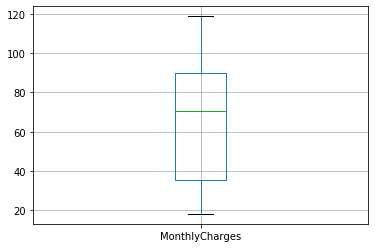

In [27]:
telecom.boxplot("MonthlyCharges")

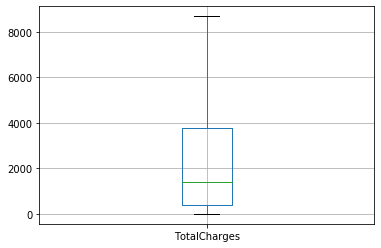

In [28]:
telecom.boxplot("TotalCharges")

In [29]:
telecom.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761826,2279.734304
std,0.368612,24.559481,30.089973,2266.794471
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.549988
50%,0.000000,29.000000,70.349998,1394.550049
75%,0.000000,55.000000,89.849998,3786.599976
max,1.000000,72.000000,118.750000,8684.799805


The monthly charges for minimum is  $18.25, 

The monthly charges for mean is $63.76

The monthly charges for max is $118.75

In [30]:
#  #Now let us work on categorical features converting into binary
#  #telecom1.gender = [1 if x == "Male" else 0 for x in telecom1.gender]
#  for col in ('Partner', 'Dependents', 'PhoneService' , 'OnlineSecurity','Contract',
#         'OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV','PaymentMethod',
#       'StreamingMovies','PaperlessBilling','MultipleLines','Churn'):
#      telecom1[col] = [1 if x == "Yes" else 0 for x in telecom1[col]]        
#  telecom1.head(3)   # See how data looks like now
#creating category group
telecom_cat = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
            'PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport','StreamingTV','StreamingMovies',
            'Contract', 'PaperlessBilling','PaymentMethod']

In [31]:

for cols in telecom_cat:
    telecom.loc[:,cols] = LabelEncoder().fit_transform(telecom.loc[:,cols])

onehotencoder = OneHotEncoder(sparse=False)
telecom_categorical = onehotencoder.fit_transform(telecom[telecom_cat])

In [32]:
telecom['Churn'].replace(to_replace='Yes', value=1, inplace=True)
telecom['Churn'].replace(to_replace='No', value=0, inplace=True)


In [33]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float32
TotalCharges        7043 non-null float64
Churn               7043 non-null int64
dtypes: float32(1), float64(1), int64(18), objec

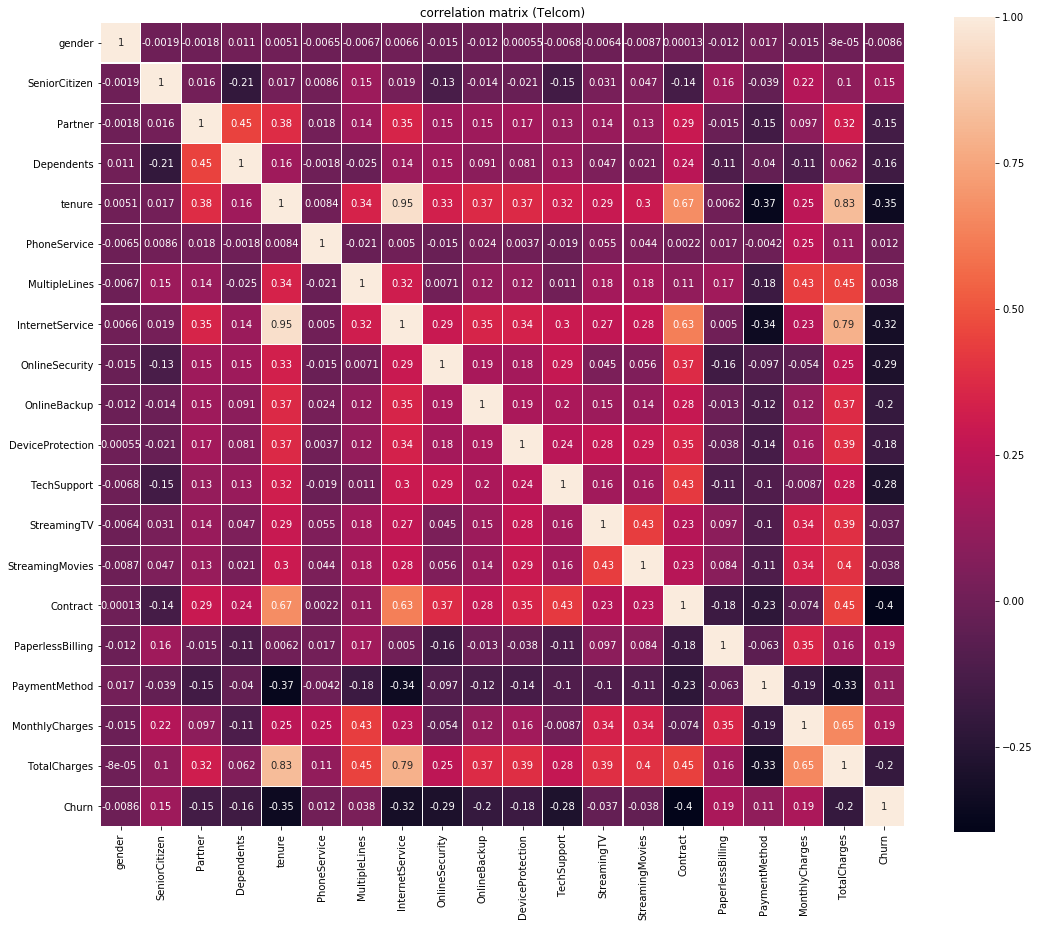

In [34]:
# make the correlation matrices.
corrmat_telecom = telecom.corr()

# heatmaps are a great way to get 
# a quick visual read on a big correlation matrix.

plt.figure(figsize=(18,15))

plt.subplot(1,1,1)
# draw the heatmap using seaborn.
sns.heatmap(corrmat_telecom, square=True, annot=True, linewidths=.10)
plt.title("correlation matrix (Telcom)")
plt.show()

# try to match the correlation numbers 
# to the scatterplots above to get a 
# sense of what each magnitude of 
# correlation can look like. the lighter the boxes the highly corrolated they are

In [35]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float32
TotalCharges        7043 non-null float64
Churn               7043 non-null int64
dtypes: float32(1), float64(1), int64(18), objec

# Creating Principle Component Analaysis 

In [36]:
#Linear dimensionality reduction a lower dimensional space.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


Y = telecom['Churn']

X = telecom[['Partner','Dependents', 'PhoneService' ,'tenure', 'OnlineSecurity','SeniorCitizen',
        'OnlineBackup','gender','DeviceProtection','TotalCharges', 'TechSupport','MultipleLines','StreamingTV',
      'StreamingMovies','PaperlessBilling','MultipleLines','MonthlyCharges']]




# # X is equal to our features
# X = telecom1[['Partner','Dependents', 'PhoneService' ,'tenure', 'OnlineSecurity','SeniorCitizen',
#         'OnlineBackup','gender','DeviceProtection','TotalCharges', 'TechSupport','MultipleLines','StreamingTV',
#       'StreamingMovies','PaperlessBilling','MultipleLines','MonthlyCharges']]

# #we transform X
X = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components=1)
telecom["pca"] = sklearn_pca.fit_transform(X)

print(
   'The percentage of total variance in the dataset explained by each',
     'component from Sklearn PCA.\n',
     sklearn_pca.explained_variance_ratio_ )



The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.23872748]


With one coponents this makes up for 29% of the variance.

In [39]:

# Create training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,  Y, test_size=0.2, random_state=465)
print('There are {:d} training samples and {:d} test samples'.format(X_train.shape[0], X_test.shape[0]))

There are 5634 training samples and 1409 test samples


In [40]:

# firest we scale our trining sets 
# and set StandardScaler as sc 
sc = StandardScaler()
# apply to both training and test sets
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [41]:
 #We will use the Decision Tree model first
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import graphviz

dtree_model = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 6)
dtree_model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [42]:
#Predicting the test results
Y_pred = dtree_model.predict(X_test)

In [43]:
# predicting accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,Y_pred)

In [44]:
# our accuracy score
accuracy

0.7785663591199432

# Using GridSearch to tune our model

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

depth_range = range(1, 10)
leaf_range = range(1,15)
param_grid = dict(max_depth=depth_range, min_samples_leaf=leaf_range)
dtree_model = tree.DecisionTreeClassifier()
grid = GridSearchCV(dtree_model, param_grid, scoring='accuracy')
grid.fit(X,Y)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7900042595484879
{'max_depth': 5, 'min_samples_leaf': 2}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [47]:
dtree_model = tree.DecisionTreeClassifier(max_depth = 5, min_samples_leaf=2)
dtree_model.fit(X_train, Y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [48]:
# predicting the accuracy of 
y_pred = dtree_model.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,Y_pred)

In [50]:
# after tuning and using cross validation we have an accuracy of 
accuracy

0.7785663591199432

In [51]:
#completing 5 folds cross validation for Decision Tree model.
dtree_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf=3)
cv_scores = cross_val_score(dtree_model, X_train, Y_train, cv = 5)

print('Accuracy scores for the 5 folds: ', cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the 5 folds:  [0.7748227  0.79325643 0.77905945 0.78774423 0.79484902]
Mean cross validation score: 0.786


# Creating Confusion Matrix for Decision Tree

In [52]:
dtree_model = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf=4)
dtree_model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [53]:
# we create a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [54]:
predictions = dtree_model.predict(X_test)

# we print the confusion m
confusion = confusion_matrix(Y_test, predictions)
print(confusion)


[[964  57]
 [257 131]]


In [55]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

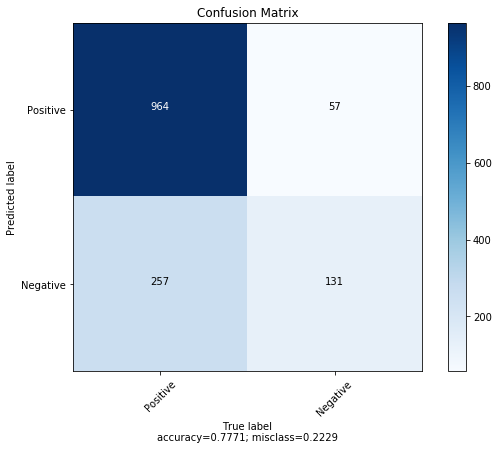

In [56]:
plot_confusion_matrix(cm=confusion, target_names = ['Positive', 'Negative'], title = 'Confusion Matrix',normalize=False)

# Decision Tree Report

In [57]:
report = classification_report(Y_test, predictions, target_names=['Negative', 'Positive'])
print(report)

              precision    recall  f1-score   support

    Negative       0.79      0.94      0.86      1021
    Positive       0.70      0.34      0.45       388

    accuracy                           0.78      1409
   macro avg       0.74      0.64      0.66      1409
weighted avg       0.76      0.78      0.75      1409



In [58]:
dtree_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 5)
dtree_model.fit(X_train, Y_train)


from datetime import datetime
#we calculate how long it took to run our model
start_time = datetime.now()

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


Duration: 0:00:00.000037


# Performing Support Vector Model

In [59]:
# trying the model
from sklearn.svm import SVC
svc = SVC()

Y = telecom['Churn']

X = telecom[['Partner','Dependents', 'PhoneService' ,'tenure', 'OnlineSecurity','SeniorCitizen',
        'OnlineBackup','gender','DeviceProtection','TotalCharges', 'TechSupport','MultipleLines','StreamingTV',
      'StreamingMovies','PaperlessBilling','MultipleLines','MonthlyCharges']]


X = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components=1)
telecom["pca"] = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

svc.fit(X,Y)

Y_ = svc.predict(X)

#svc.score(X, Y)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.23872748]


In [60]:

# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print('There are {:d} training samples and {:d} test samples'.format(X_train.shape[0], X_test.shape[0]))

There are 5634 training samples and 1409 test samples


In [61]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [62]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
svc_model = SVC(kernel = 'linear', random_state = 0)
svc_model.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [63]:
accuracy

0.7785663591199432

In [64]:
# Predicting the Test set results
Y_pred = svc_model.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,Y_pred)

In [66]:
cv_scores = cross_val_score(svc_model, X_train, Y_train, cv = 5)

print('Accuracy scores for the 5 folds: ', cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the 5 folds:  [0.79875887 0.80035492 0.78970719 0.80550622 0.79662522]
Mean cross validation score: 0.798


# Confusion Matrix For SVC Model

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)


In [68]:
predictions = svc_model.predict(X_test)

confusion = confusion_matrix(Y_test, predictions)
print(confusion)

[[916 107]
 [176 210]]


In [69]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

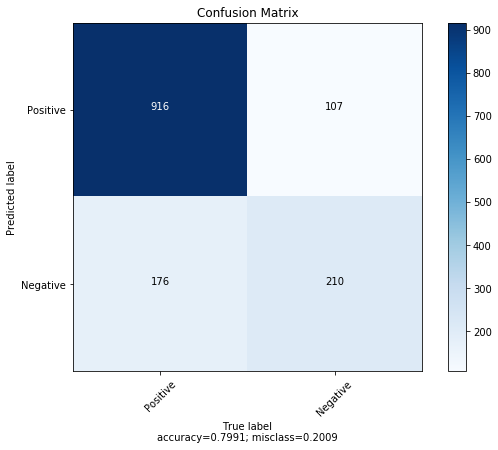

In [70]:
plot_confusion_matrix(cm=confusion, target_names = ['Positive', 'Negative'], title = 'Confusion Matrix',normalize=False)

In [71]:
report = classification_report(Y_test, predictions, target_names=['Negative', 'Positive'])
print(report)

              precision    recall  f1-score   support

    Negative       0.84      0.90      0.87      1023
    Positive       0.66      0.54      0.60       386

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [72]:
svc_model = SVC(kernel = 'linear', random_state = 0)
svc_model.fit(X_train, Y_train)


from datetime import datetime
start_time = datetime.now()
# do your work here
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


Duration: 0:00:00.000034


# KNeighborsClassifier Model

In [73]:
# # Create the features matrix
# X = telecom[['Partner', 'Dependents', 'tenure', 'PhoneService',
#        'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
#        'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
#        'MonthlyCharges', 'TotalCharges']]
# # Create the target vector
# Y = telecom[["Churn"]]

In [74]:
# trying the model
from sklearn.neighbors import KNeighborsClassifier 
knn_model=KNeighborsClassifier()

Y = telecom['Churn']

X = telecom[['Partner','Dependents', 'PhoneService' ,'tenure', 'OnlineSecurity','SeniorCitizen',
        'OnlineBackup','gender','DeviceProtection','TotalCharges', 'TechSupport','MultipleLines','StreamingTV',
      'StreamingMovies','PaperlessBilling','MultipleLines','MonthlyCharges']]


X = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components=1)
telecom["pca"] = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)





The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.23872748]


In [75]:

# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print('There are {:d} training samples and {:d} test samples'.format(X_train.shape[0], X_test.shape[0]))

There are 5634 training samples and 1409 test samples


In [76]:
knn_model = KNeighborsClassifier(n_neighbors=7, metric='euclidean', weights='distance')
knn_model.fit(X_train, Y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='distance')

In [81]:
Y_pred=knn_model.predict(X_test)

In [82]:
print(confusion_matrix(Y_test,Y_pred))

[[881 142]
 [199 187]]


In [83]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [84]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1023
           1       0.57      0.48      0.52       386

    accuracy                           0.76      1409
   macro avg       0.69      0.67      0.68      1409
weighted avg       0.75      0.76      0.75      1409



# Choosing a K value

In [85]:
error_rate = []

for i in range(1,40):
    
    knn_model= KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train,Y_train)
    pred_i = knn_model.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

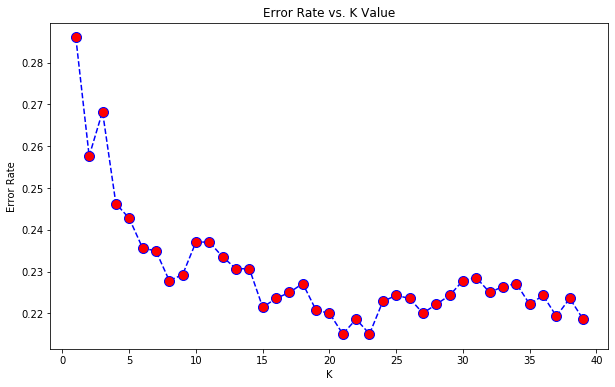

In [86]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Finding the error rate. It seems at K =18 we stay around 0.23. from K=18 to 40 we remain around 0.23

In [87]:
# we cross validate our model. We itrate 5 times
cv_scores = cross_val_score(knn_model, X_train, Y_train, cv = 5)

print('Accuracy scores for the 5 folds: ', cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the 5 folds:  [0.77304965 0.7826087  0.76397516 0.79129663 0.79040853]
Mean cross validation score: 0.780


In [88]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K= 8
knn_model = KNeighborsClassifier(n_neighbors=8)

knn_model.fit(X_train,Y_train)
Y_pred = knn_model.predict(X_test)

print('WITH K=8')
print('\n')
print(confusion_matrix(Y_test,Y_pred))
print('\n')
print(classification_report(Y_test,Y_pred))

WITH K=8


[[919 104]
 [217 169]]


              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1023
           1       0.62      0.44      0.51       386

    accuracy                           0.77      1409
   macro avg       0.71      0.67      0.68      1409
weighted avg       0.76      0.77      0.76      1409



In [89]:
# lets try with 15
knn_model = KNeighborsClassifier(n_neighbors=15)

knn_model.fit(X_train,Y_train)
Y_pred = knn_model.predict(X_test)

print('WITH K=15')
print('\n')
print(confusion_matrix(Y_test,Y_pred))
print('\n')
print(classification_report(Y_test,Y_pred))

WITH K=15


[[907 116]
 [196 190]]


              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1023
           1       0.62      0.49      0.55       386

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



below we provide a graphical matrix for easier understanding.

In [90]:
predictions = knn_model.predict(X_test)

confusion = confusion_matrix(Y_test, predictions)


In [91]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

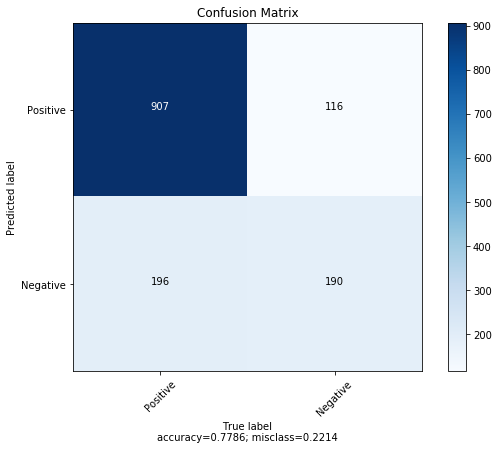

In [92]:
plot_confusion_matrix(cm=confusion, target_names = ['Positive', 'Negative'], title = 'Confusion Matrix',normalize=False)

In [93]:
knn_model.fit(X_train,Y_train)
Y_pred = knn_model.predict(X_test)

from datetime import datetime
start_time = datetime.now()
# do your work here
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:00.000027


# Random Forest Model 

In [94]:
# trying the model
from sklearn.ensemble import RandomForestClassifier

Y = telecom['Churn']

X = telecom[['Partner','Dependents', 'PhoneService' ,'tenure', 'OnlineSecurity','SeniorCitizen',
        'OnlineBackup','gender','DeviceProtection','TotalCharges', 'TechSupport','MultipleLines','StreamingTV',
      'StreamingMovies','PaperlessBilling','MultipleLines','MonthlyCharges']]


X = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components=1)
telecom["pca"] = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)




The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.23872748]


In [95]:
#fit model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)
print('There are {:d} training samples and {:d} test samples'.format(X_train.shape[0], X_test.shape[0]))
rfc_model=RandomForestClassifier()
rfc_model.fit(X_train,Y_train)


There are 5634 training samples and 1409 test samples


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [96]:
# Predicting the Test set results
Y_pred = rfc_model.predict(X_test)

In [97]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,Y_pred)

In [98]:
#model acceracy
accuracy

0.7757274662881476

In [99]:
# applying cross validation to random forest model
cv_scores = cross_val_score(rfc_model, X_train, Y_train, cv = 5)

print('Accuracy scores for the 5 folds: ', cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the 5 folds:  [0.79166667 0.78349601 0.78172138 0.77886323 0.77708703]
Mean cross validation score: 0.783


In [100]:
rfc_prediction = rfc_model.predict(X_test)
print('\n')
print(confusion_matrix(Y_test,Y_pred))
print('\n')
print(classification_report(Y_test,Y_pred))



[[932  89]
 [227 161]]


              precision    recall  f1-score   support

           0       0.80      0.91      0.86      1021
           1       0.64      0.41      0.50       388

    accuracy                           0.78      1409
   macro avg       0.72      0.66      0.68      1409
weighted avg       0.76      0.78      0.76      1409



In [101]:
rfc_model=RandomForestClassifier()
rfc_model.fit(X_train,Y_train)


from datetime import datetime
start_time = datetime.now()
# do your work here
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:00.000034


# Logistic Classification Model

In [102]:
# trying the model and applying PCA
from sklearn.linear_model import LogisticRegression

X = telecom[['Partner','Dependents', 'PhoneService' ,'tenure', 'OnlineSecurity','SeniorCitizen',
        'OnlineBackup','gender','DeviceProtection','TotalCharges', 'TechSupport','MultipleLines','StreamingTV',
      'StreamingMovies','PaperlessBilling','MultipleLines','MonthlyCharges']]

Y = telecom['Churn']

X = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components=1)
telecom["pca"] = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)


Y = telecom['Churn']


The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.23872748]


In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)
print('There are {:d} training samples and {:d} test samples'.format(X_train.shape[0], X_test.shape[0]))

There are 5634 training samples and 1409 test samples


In [104]:
#building the model
lr_model = LogisticRegression(solver='lbfgs', penalty='none', max_iter=10000)
lr_model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [105]:
# Predicting the Test set results
Y_pred = lr_model.predict(X_test)

In [106]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,Y_pred)

In [107]:
# our accuracy score
accuracy

0.7991483321504613

In [108]:
lr_score = lr_model.score(X_test, Y_test)

print('Accuracy of Logistic Regression: {:.3f}'.format(lr_score))

Accuracy of Logistic Regression: 0.799


In [109]:
#applying cross validation to logistic regression model
cv_scores = cross_val_score(lr_model, X_train, Y_train, cv = 5)

print('Accuracy scores for the 5 folds: ', cv_scores)
print('Mean cross validation score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the 5 folds:  [0.80319149 0.80479148 0.79680568 0.80195382 0.79218472]
Mean cross validation score: 0.800


In [110]:
# confusion matrix and classification report
rfc_prediction = lr_model.predict(X_test)
print('\n')
print(confusion_matrix(Y_test,Y_pred))
print('\n')
print(classification_report(Y_test,Y_pred))



[[931  90]
 [193 195]]


              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1021
           1       0.68      0.50      0.58       388

    accuracy                           0.80      1409
   macro avg       0.76      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [111]:
lr_model = LogisticRegression(solver='lbfgs', penalty='none', max_iter=10000)
lr_model.fit(X_train, Y_train)

from datetime import datetime
start_time = datetime.now()
# do your work here
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:00.000034


# Here we are using sklearn's RandomForestClassifier with ensemble learning to choose most relevent features for our model.

In [112]:
# trying the model and applying PCA
from sklearn import ensemble

Y = telecom['Churn']

X = telecom[['Partner','Dependents', 'PhoneService' ,'tenure', 'OnlineSecurity','SeniorCitizen',
        'OnlineBackup','gender','DeviceProtection','TotalCharges', 'TechSupport','MultipleLines','StreamingTV',
      'StreamingMovies','PaperlessBilling','MultipleLines','MonthlyCharges']]


X = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components=1)
telecom["pca"] = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)



The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.23872748]


Weak learner 0 R^2: -1.81171467511275
Weak learner 20 R^2: -0.16936892356028777
Weak learner 40 R^2: -0.00507104049124818
Weak learner 60 R^2: -0.00032968766311824993
Weak learner 80 R^2: -3.063243280454486e-05
Weak learner 100 R^2: -1.3127003961610484e-06


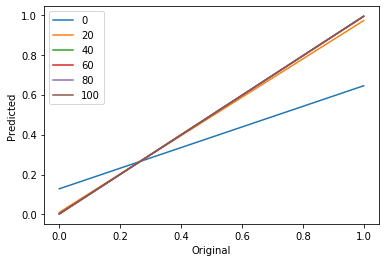

Overall R^2:
0.9948396647104789


In [113]:
Y = telecom['Churn']

X = telecom[['Partner','Dependents', 'PhoneService' ,'tenure', 'OnlineSecurity','SeniorCitizen',
        'OnlineBackup','gender','DeviceProtection','TotalCharges', 'TechSupport','MultipleLines','StreamingTV',
      'StreamingMovies','PaperlessBilling','MultipleLines','MonthlyCharges']]



# Make the categorical variable 'country' into dummies.
#X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Store values from loops.
preds = pd.DataFrame()
labels = []

uniquex = telecom['Churn'].unique()

# Iterate through decision trees, each time using the residuals
# from the previous tree as the inputs.
for m in range(0, 101):
    
    # Initialize and fit the tree. Set the max depth to 2.
    decision_tree = tree.DecisionTreeRegressor(max_depth=10)
    decision_tree.fit(X,Y)
    
    # Get and store predicted values.
    pred = decision_tree.predict(X)
    preds['pred{}'.format(m)] = pred
    
    # Residuals.
    Y = Y - pred

    # Output every 20 iterations.
    if m % 20 == 0:
        print('Weak learner {} R^2: {}'.format(m, decision_tree.score(X, Y)))
        labels = labels + [m]
        bestpred = preds.sum(axis=1)
        plt.plot(uniquex, np.poly1d(np.polyfit(telecom['Churn'], bestpred, 1))(uniquex))
       
plt.legend(labels)
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.show()
predicted = preds.sum(axis=1)

print('Overall R^2:')
print(np.corrcoef(telecom['Churn'], predicted)[0, 1])


Overall the weak point of our model is the low score PCA we received. Majority of our tests scored about 75%. The logisticRegression model scored the highest at 80%. LogesticRegressiondisplayed the best f1 accuracy score. Our support vector model came second with 79% score and KNN's model also scored 79%.